In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.1,0,.1]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [4]:
gauss_1 = get_gaussian_dist(mean,std,datapoints)
gauss_2 = get_gaussian_dist(mean,std,datapoints)
water = get_waterfall(datapoints)

dict = {'Base_Gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
fake_iris=pd.DataFrame(dict)

In [6]:
fake_iris.sample(5)

,Base_Gauss,Sun_gauss,Water_multi
17409,0.363938,0.575455,-0.1
3841,0.708698,0.487989,0.0
1289,0.561722,0.445556,0.0
10500,0.479331,0.568143,0.0
13417,0.529981,0.512941,-0.1


In [36]:
fake_iris['plant_1_base'] = fake_iris['Base_Gauss'] + 9.9
fake_iris['plant_2_base'] = fake_iris['Base_Gauss'] + 10.1
fake_iris['plant_3_base'] = (fake_iris['Base_Gauss'] * 1.4) + 9.8

In [37]:
fake_iris.describe()

,Base_Gauss,Sun_gauss,Water_multi,plant_1_base,plant_2_base,plant_3_base
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.499819,0.500149,0.000800,10.399819,10.599819,10.499746
std,0.083764,0.083644,0.081644,0.083764,0.083764,0.117269
min,0.182052,0.189234,-0.100000,10.082052,10.282052,10.054873
25%,0.443382,0.444215,-0.100000,10.343382,10.543382,10.420735
50%,0.500725,0.500672,0.000000,10.400725,10.600725,10.501016
75%,0.556776,0.556300,0.100000,10.456776,10.656776,10.579486
max,0.862405,0.852127,0.100000,10.762405,10.962405,11.007367


(array([1.000e+00, 3.000e+00, 4.000e+00, 1.200e+01, 1.200e+01, 1.900e+01,
        3.800e+01, 5.300e+01, 7.600e+01, 1.120e+02, 1.290e+02, 2.000e+02,
        2.810e+02, 3.780e+02, 4.510e+02, 5.600e+02, 7.040e+02, 8.300e+02,
        9.260e+02, 1.023e+03, 1.177e+03, 1.208e+03, 1.255e+03, 1.335e+03,
        1.307e+03, 1.194e+03, 1.170e+03, 1.011e+03, 9.610e+02, 7.580e+02,
        6.890e+02, 5.290e+02, 4.190e+02, 3.440e+02, 2.690e+02, 1.940e+02,
        1.150e+02, 1.010e+02, 5.800e+01, 3.400e+01, 2.500e+01, 1.300e+01,
        9.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([10.0548735 , 10.07392337, 10.09297325, 10.11202312, 10.13107299,
        10.15012287, 10.16917274, 10.18822261, 10.20727249, 10.22632236,
        10.24537224, 10.26442211, 10.28347198, 10.30252186, 10.32157173,
        10.3406216 , 10.35967148, 10.37872135, 10.39777122, 10.4168211 ,
        10.43587097, 10.45492085, 10.47397072, 10.49302059, 10.51207047,
        10.

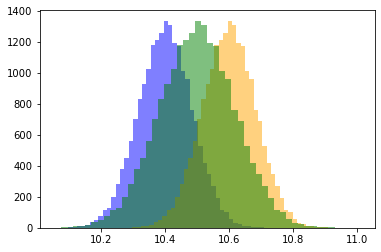

In [38]:
plt.hist(fake_iris['plant_1_base'], bins = 50, color='blue',alpha=.5)
plt.hist(fake_iris['plant_2_base'], bins = 50, color='orange',alpha=.5)
plt.hist(fake_iris['plant_3_base'], bins = 50, color='green',alpha=.5)